In [214]:
import copy
import math
import random
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')

In [168]:
df_sub = pd.read_pickle('Data/subscribers')
df_engage = pd.read_pickle('Data/engagement')
df_rep = pd.read_pickle('Data/customer_service_reps')
df_spend = pd.read_excel('Data/advertising_spend_data.xlsx', header=2)

# Data Exploration

In [5]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [9]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 1 to 28832323
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 197.3 MB


In [13]:
rep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208643 entries, 4 to 2248413
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   customer_service_rep_id  int64         
 1   subid                    int64         
 2   current_sub_TF           bool          
 3   cancel_date              datetime64[ns]
 4   account_creation_date    datetime64[ns]
 5   num_trial_days           int64         
 6   trial_completed_TF       bool          
 7   billing_channel          object        
 8   revenue_net_1month       float64       
 9   payment_period           int64         
 10  last_payment             datetime64[ns]
 11  next_payment             datetime64[ns]
 12  renew                    object        
dtypes: bool(2), datetime64[ns](4), float64(1), int64(4), object(2)
memory usage: 206.4+ MB


In [28]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     10 non-null     object
 1   fb                       10 non-null     object
 2   email                    10 non-null     object
 3   search                   10 non-null     object
 4   brand_sem_intent_google  10 non-null     object
 5   affiliate                10 non-null     object
 6   email_blast              10 non-null     object
 7   pinterest                10 non-null     object
 8   referral                 10 non-null     object
dtypes: object(9)
memory usage: 848.0+ bytes


# Inspect attributes

In [8]:
# List all plan type and corresponding monthly price and discount price

df_sub[['plan_type','monthly_price','discount_price','join_fee']].value_counts()

plan_type                          monthly_price  discount_price  join_fee
base_uae_14_day_trial              4.7343         4.5141           0.0367     109141
                                                                   0.0000      33292
                                                                   0.3303      25313
                                                                   0.6606      12282
                                                                   0.1101      10648
                                                                   0.3670       1333
high_uae_14_day_trial              5.1013         5.0279           0.0367        323
low_uae_no_trial                   1.0643         1.0276           0.0000        167
base_uae_14_day_trial              4.7343         4.5141           0.1835        146
base_eur_14_day_trial              4.4407         4.2205           0.0367         13
high_sar_14_day_trial              4.3673         4.0737           0.0000  

In [53]:
df_sub['age'].value_counts()

50.000000        6355
40.000000        5509
60.000000        5221
48.000000        4651
47.000000        4517
                 ... 
63.909635           1
582.000000          1
781940.000000       1
346.000000          1
636.000000          1
Name: age, Length: 278, dtype: int64

<AxesSubplot:>

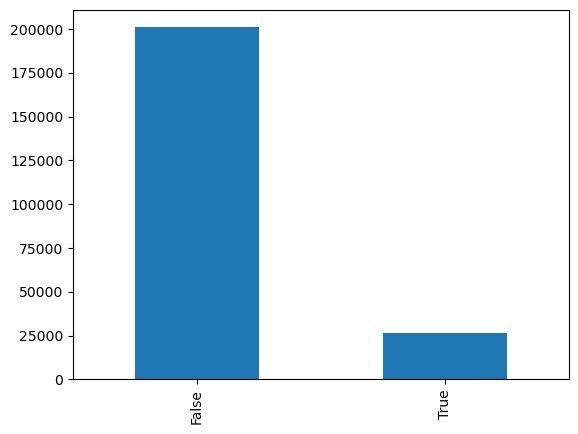

In [54]:
df_sub['male_TF'].value_counts().plot.bar()

<AxesSubplot:>

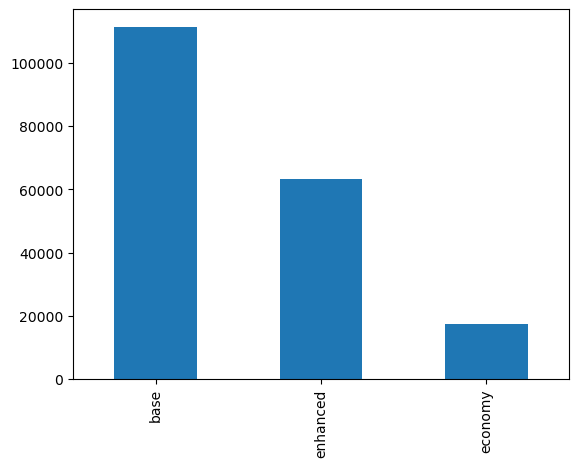

In [56]:
df_sub['package_type'].value_counts().plot.bar()

<AxesSubplot:>

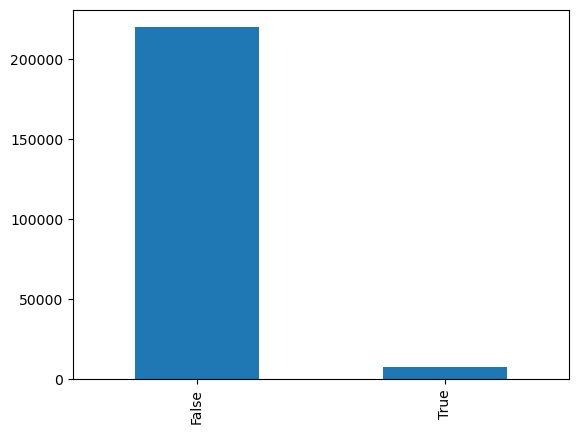

In [57]:
df_sub['retarget_TF'].value_counts().plot.bar()

<AxesSubplot:>

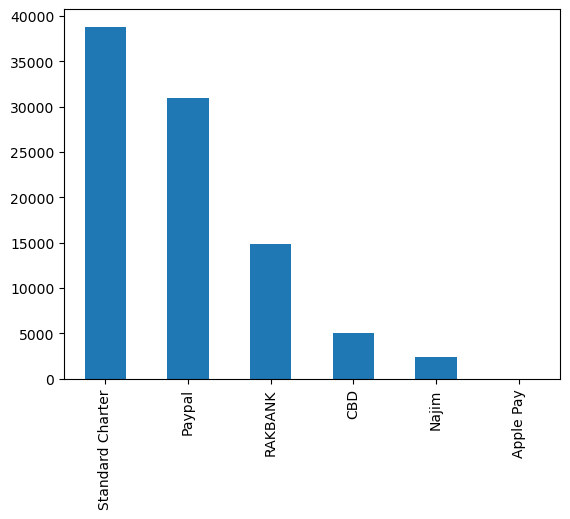

In [60]:
df_sub['payment_type'].value_counts().plot.bar()

<AxesSubplot:>

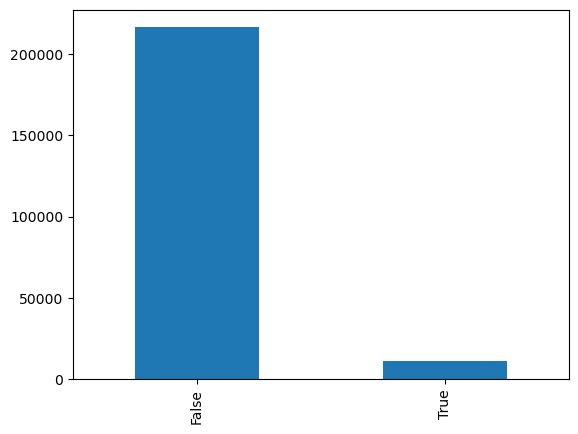

In [62]:
df_sub['initial_credit_card_declined'].value_counts().plot.bar()

<AxesSubplot:>

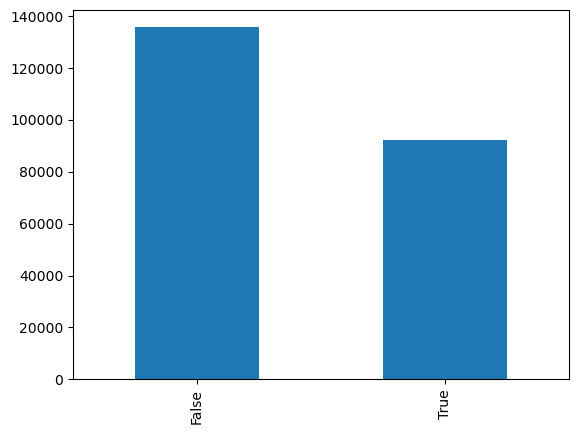

In [63]:
df_sub['paid_TF'].value_counts().plot.bar()

<AxesSubplot:>

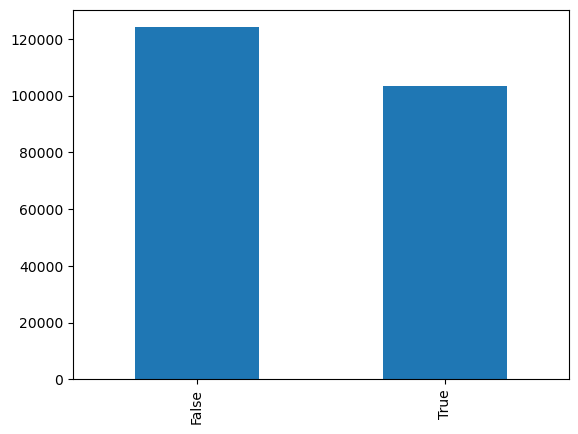

In [65]:
df_sub['cancel_before_trial_end'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

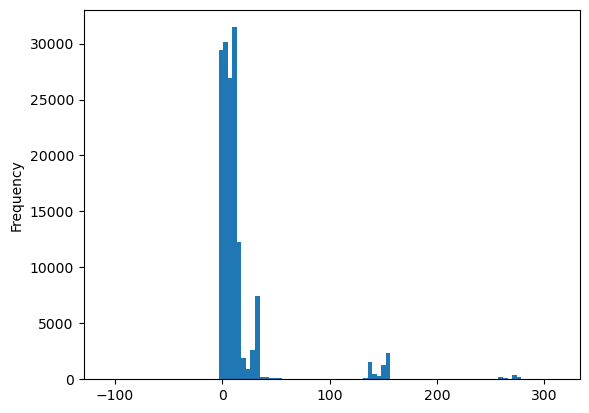

In [81]:
df_sub['creation_until_cancel_days'].plot.hist(bins=100)

<AxesSubplot:>

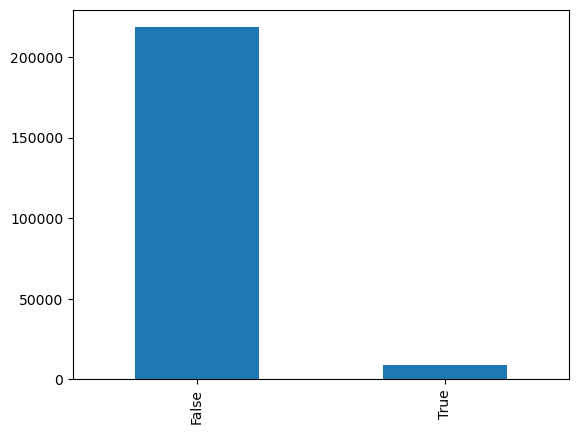

In [74]:
df_sub['refund_after_trial_TF'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

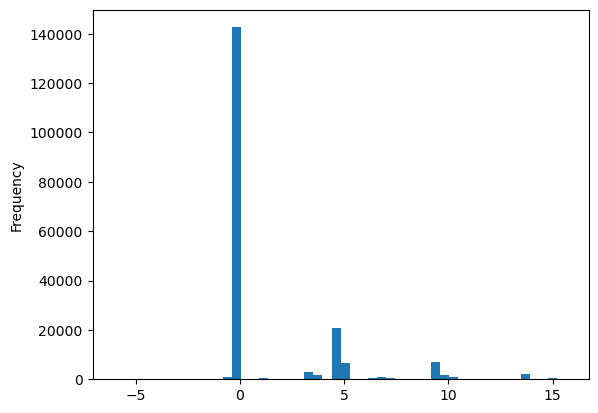

In [80]:
df_sub['revenue_net'].plot.hist(bins=50)

<AxesSubplot:>

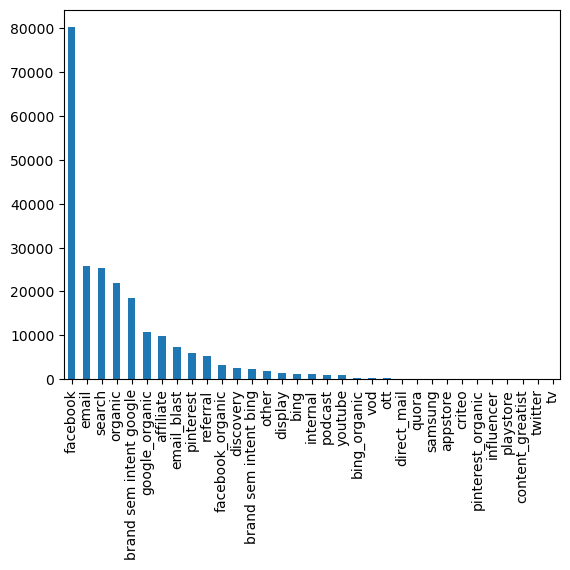

In [82]:
df_sub['attribution_technical'].value_counts().plot.bar()

<AxesSubplot:>

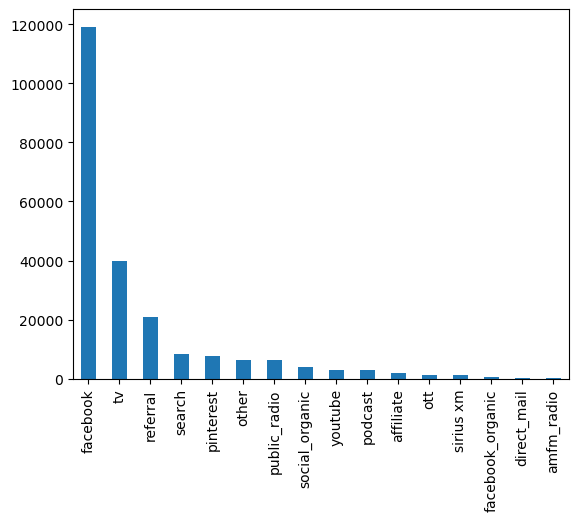

In [83]:
df_sub['attribution_survey'].value_counts().plot.bar()

<AxesSubplot:>

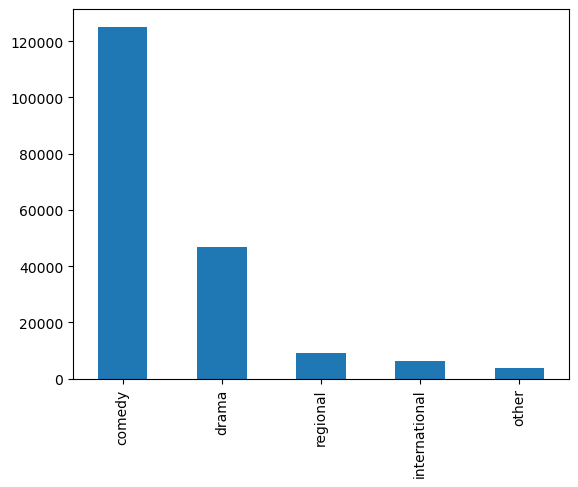

In [84]:
df_sub['preferred_genre'].value_counts().plot.bar()

<AxesSubplot:>

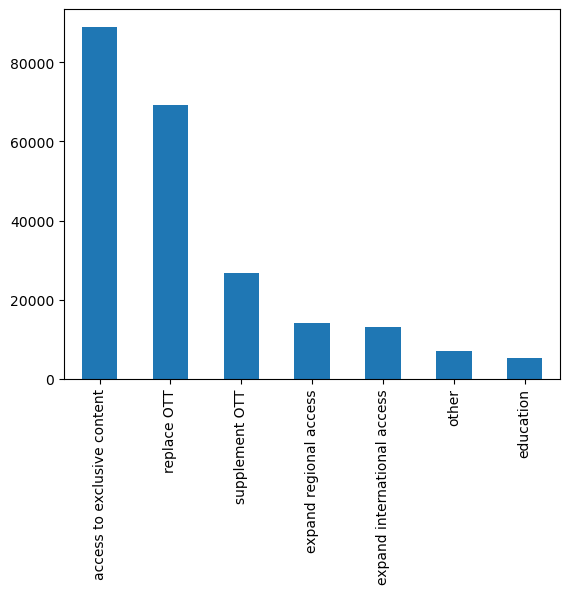

In [85]:
df_sub['intended_use'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

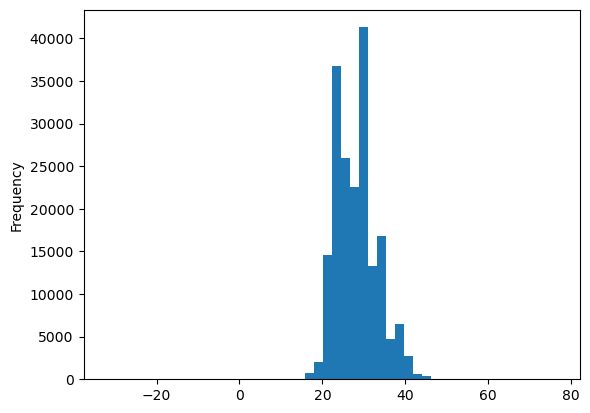

In [88]:
df_sub['weekly_consumption_hour'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

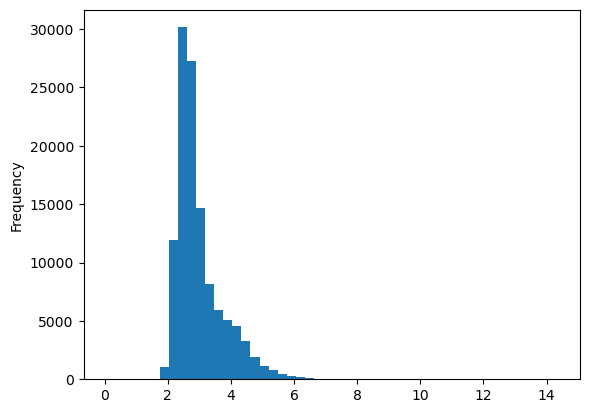

In [93]:
df_sub['num_weekly_services_utilized'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

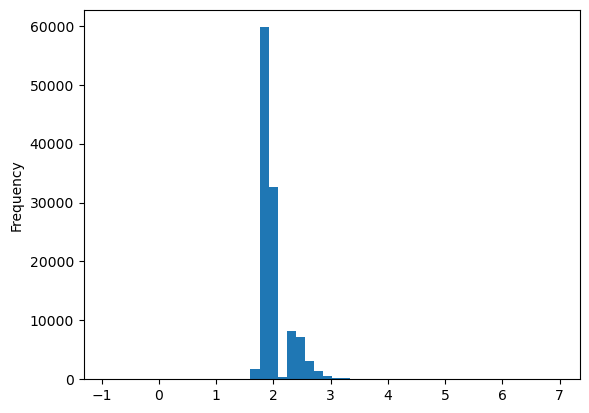

In [99]:
df_sub['num_ideal_streaming_services'].plot.hist(bins=50)

<AxesSubplot:>

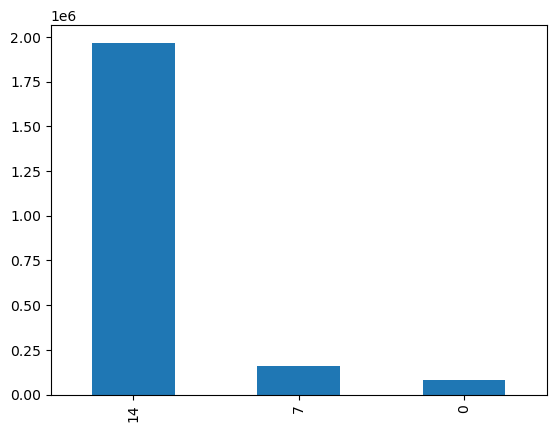

In [109]:
df_rep['num_trial_days'].value_counts().plot.bar()

# Preprocessing

In [169]:
# drop negative values
df_sub = df_sub.drop(df_sub[df_sub['join_fee'] < 0].index)

In [173]:
df_sub.loc[(df_sub['age'] > 100) | (df_sub['age'] <= 10), 'age'] = np.nan
df_sub = df_sub.dropna(subset='age')

In [175]:
# drop nan rows
df_sub = df_sub.dropna(subset=['male_TF'])
df_sub.shape

(191487, 29)

In [176]:
#remove negatives
df_sub = df_sub.drop(df_sub[df_sub['weekly_consumption_hour']<0].index)
df_sub = df_sub.drop(df_sub[df_sub['num_ideal_streaming_services']<0].index)

df_sub.shape

(191457, 29)

## Data

In [177]:
df_train = df_sub[[
    'age', 'male_TF', 'op_sys', 'package_type', 'preferred_genre',
    'intended_use', 'weekly_consumption_hour'
]]

In [178]:
df_train

,age,male_TF,op_sys,package_type,preferred_genre,intended_use,weekly_consumption_hour
380374,70.0,False,NaN,base,comedy,access to exclusive content,22.951579
496617,25.0,True,iOS,enhanced,regional,replace OTT,36.001186
356799,30.0,False,Android,base,drama,replace OTT,20.051667
681701,28.0,False,iOS,base,comedy,replace OTT,22.951579
284782,70.0,False,NaN,base,comedy,access to exclusive content,20.051667
...,...,...,...,...,...,...,...
603751,43.0,False,iOS,base,drama,access to exclusive content,24.401536
509326,38.0,False,iOS,enhanced,comedy,supplement OTT,28.751405
229587,49.0,False,iOS,enhanced,comedy,replace OTT,27.301448
281340,45.0,False,iOS,base,comedy,access to exclusive content,31.651317


In [179]:
# drop nan rows
df_train = df_train.dropna(subset=['op_sys', 'package_type',
                                   'preferred_genre', 'intended_use',
                                   'weekly_consumption_hour'])

df_train.shape

(143862, 7)

### Dummy

In [180]:
df_train = pd.get_dummies(df_train,
               columns=['male_TF', 'op_sys', 'package_type', 'preferred_genre','intended_use'],
               prefix=['gender_is','op_sys_is','package_type_is','preferred_genre_is','intended_use_is'])

In [181]:
df_train = df_train.rename(columns={'gender_is_False':'Female','gender_is_True':'Male'})

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143862 entries, 496617 to 598241
Data columns (total 21 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   age                                          143862 non-null  float64
 1   weekly_consumption_hour                      143862 non-null  float64
 2   Female                                       143862 non-null  uint8  
 3   Male                                         143862 non-null  uint8  
 4   op_sys_is_Android                            143862 non-null  uint8  
 5   op_sys_is_iOS                                143862 non-null  uint8  
 6   package_type_is_base                         143862 non-null  uint8  
 7   package_type_is_economy                      143862 non-null  uint8  
 8   package_type_is_enhanced                     143862 non-null  uint8  
 9   preferred_genre_is_comedy                    143862 no

## K-means Models

### K-means Model 1 (dummy)

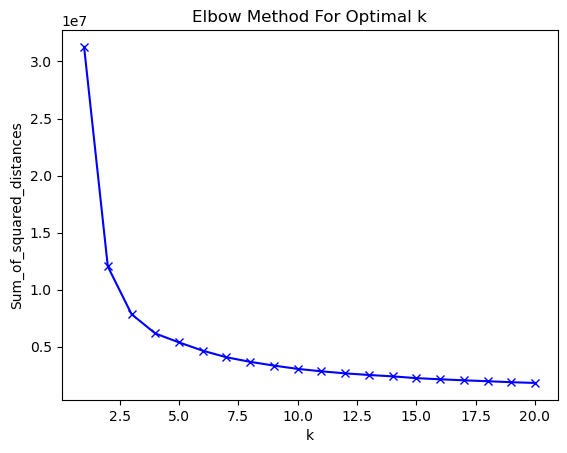

In [182]:
# Generate elbow-method diagram
    
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,21)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

fitting(df_train)

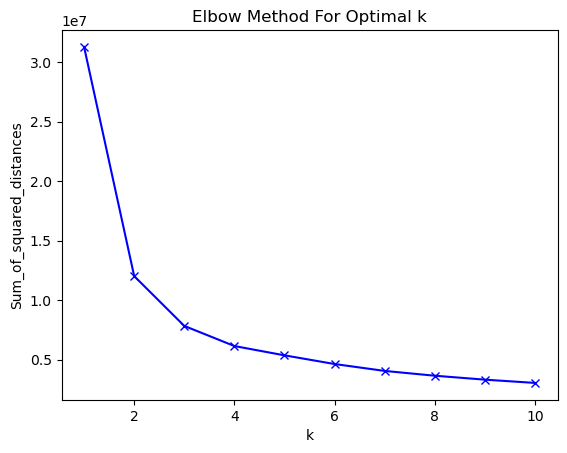

In [183]:
def fitting2(df):
    Sum_of_squared_distances = []
    K = range(1,11)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

fitting2(df_train)

### K-means Model 2 (scale+dummy)

In [184]:
scaler = preprocessing.StandardScaler()
scale_cols = pd.DataFrame(scaler.fit_transform(df_train[['age','weekly_consumption_hour']])).rename(columns={0:'age_scale',1:'weekly_consumption_hour_scale'})
df_train = df_train.reset_index(drop=True)
df_train_total = pd.concat([scale_cols,df_train],axis=1)
df_train_dummy = pd.concat([scale_cols,df_train.iloc[:,2:]],axis=1)

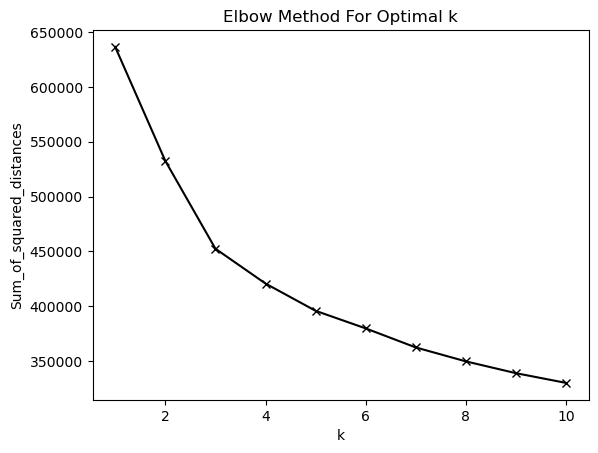

In [185]:
def fitting3(df):
    Sum_of_squared_distances = []
    K = range(1,11)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'kx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

fitting3(df_train_dummy)

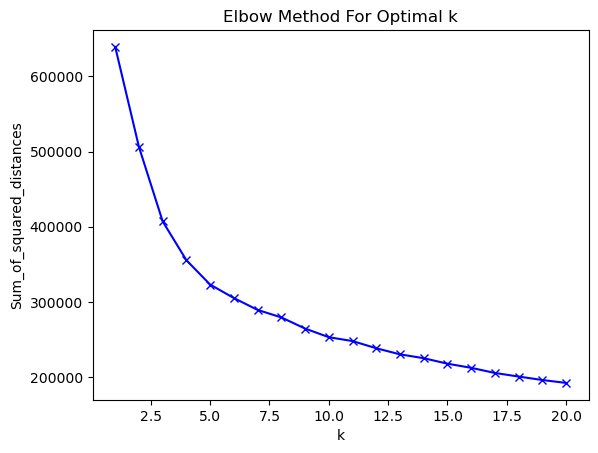

In [143]:
fitting(df_train_dummy)

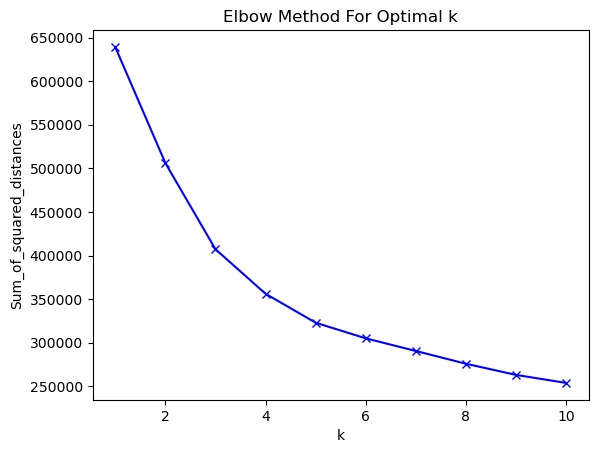

In [144]:
fitting2(df_train_dummy)

### K-means Model 4 (engage)

In [186]:
df_train_eng = df_sub[[
    'subid', 'age', 'male_TF', 'op_sys', 'package_type', 'preferred_genre',
    'intended_use', 'weekly_consumption_hour'
]]

df_train_eng = df_train_eng.dropna(subset=['op_sys', 'package_type',
                                           'preferred_genre', 'intended_use',
                                           'weekly_consumption_hour'])

eng = df_engage.iloc[:, [0, 2, 4, 5, 6, 7]]
eng = eng.groupby('subid').mean().reset_index()

df_train_eng = eng.merge(df_train_eng, on='subid',
                      how='left').dropna().reset_index(drop=True)

df_train_eng = pd.get_dummies(df_train_eng,
                              columns=['male_TF', 'op_sys',
                                       'package_type','preferred_genre',
                                       'intended_use'],
                               prefix=['gender_is', 'op_sys_is',
                                       'package_type_is',
                                       'preferred_genre_is',
                                       'intended_use_is'])

df_train_eng = df_train_eng.rename(columns={
    'gender_is_False': 'Female',
    'gender_is_True': 'Male'
})

scaler = preprocessing.StandardScaler()

scale_cols_eng = pd.DataFrame(
    scaler.fit_transform(df_train_eng[[
        'app_opens', 'num_videos_completed', 'num_videos_more_than_30_seconds',
        'num_videos_rated', 'num_series_started', 'age',
        'weekly_consumption_hour'
    ]])).rename(
        columns={
            0: 'app_opens_scale',
            1: 'num_videos_completed_scale',
            2: 'num_videos_more_than_30_seconds_scale',
            3: 'num_videos_rated_scale',
            4: 'num_series_started_scale',
            5: 'age_scale',
            6: 'weekly_consumption_hour_scale'
        })

df_train_eng = df_train_eng.reset_index(drop=True)

df_train_eng_total = pd.concat([scale_cols_eng, df_train], axis=1)
df_train_eng_dummy = pd.concat([scale_cols_eng, df_train_eng.iloc[:, 8:]], axis=1)

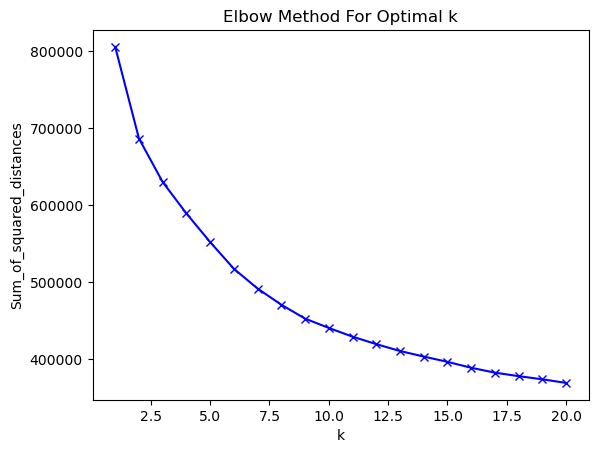

In [187]:
fitting(df_train_eng_dummy)

In [188]:
kmeans_eng = KMeans(n_clusters=3, random_state=666, max_iter=1000,init='k-means++').fit(df_train_eng_dummy)
label = pd.DataFrame(kmeans_eng.labels_,columns=['cluster'])
model_km = pd.concat([df_train_eng_total.reset_index(drop=True),label],axis=1)

In [189]:
model_km.groupby('cluster').mean()

,app_opens_scale,num_videos_completed_scale,num_videos_more_than_30_seconds_scale,num_videos_rated_scale,num_series_started_scale,age_scale,weekly_consumption_hour_scale,age,weekly_consumption_hour,Female,Male,op_sys_is_Android,op_sys_is_iOS,package_type_is_base,package_type_is_economy,package_type_is_enhanced,preferred_genre_is_comedy,preferred_genre_is_drama,preferred_genre_is_international,preferred_genre_is_other,preferred_genre_is_regional,intended_use_is_access to exclusive content,intended_use_is_education,intended_use_is_expand international access,intended_use_is_expand regional access,intended_use_is_other,intended_use_is_replace OTT,intended_use_is_supplement OTT
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.252319,0.806922,-0.280426,4.961138,1.272864,0.485381,-0.013884,46.177093,28.230826,0.846696,0.153304,0.337445,0.662555,0.562115,0.092952,0.344934,0.639207,0.242291,0.033480,0.028634,0.056388,0.450220,0.000000,0.000441,0.002203,0.034802,0.361233,0.151101
1.0,0.409101,0.759405,0.270558,-0.065954,0.741488,-0.091581,-0.015541,45.516045,28.059641,0.867087,0.132913,0.355272,0.644728,0.554477,0.098044,0.347479,0.632385,0.247373,0.037659,0.025416,0.057167,0.450450,0.000277,0.001006,0.000930,0.032204,0.370255,0.144879
2.0,-0.386606,-0.735285,-0.232379,-0.198243,-0.743202,0.058316,0.014910,45.543677,28.047390,0.863749,0.136251,0.348075,0.651925,0.554046,0.096181,0.349773,0.631546,0.250838,0.037178,0.024326,0.056111,0.445311,0.000459,0.000872,0.001033,0.031923,0.370542,0.149860


## Both scale/unscale -> elbow = 3 will use 3 as number of clusters will use 'df_train_dummy' because of smaller ssd

In [194]:
model_2 = KMeans(n_clusters=3, random_state=666, max_iter=1000,init='k-means++').fit(df_train_dummy)
label = pd.DataFrame(model_2.labels_,columns=['cluster'])
model_km_2 = pd.concat([df_train_dummy.reset_index(drop=True),label],axis=1)

In [191]:
model_km_2.groupby('cluster').mean()

,age_scale,weekly_consumption_hour_scale,Female,Male,op_sys_is_Android,op_sys_is_iOS,package_type_is_base,package_type_is_economy,package_type_is_enhanced,preferred_genre_is_comedy,preferred_genre_is_drama,preferred_genre_is_international,preferred_genre_is_other,preferred_genre_is_regional,intended_use_is_access to exclusive content,intended_use_is_education,intended_use_is_expand international access,intended_use_is_expand regional access,intended_use_is_other,intended_use_is_replace OTT,intended_use_is_supplement OTT
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.848889,-0.304736,0.982216,0.017784,0.331746,0.668254,0.502556,0.059995,0.437449,0.706219,0.178420,0.024694,0.022762,0.067904,0.388044,0.000100,0.000450,0.000466,0.019865,0.433469,0.157606
1,0.873292,-0.383041,0.982211,0.017789,0.367052,0.632948,0.625868,0.129670,0.244463,0.597527,0.296139,0.046200,0.025585,0.034550,0.501849,0.000663,0.001692,0.001779,0.049531,0.301685,0.142802
2,0.034275,1.521165,0.344176,0.655824,0.359439,0.640561,0.522687,0.105746,0.371567,0.539008,0.313234,0.045034,0.028486,0.074238,0.465450,0.000151,0.000340,0.000491,0.022819,0.369035,0.141713


# Allocation

## Data

In [200]:
attr = df_sub[['account_creation_date','attribution_technical','attribution_survey']]
attr

,account_creation_date,attribution_technical,attribution_survey
380374,2020-03-01 15:44:35,facebook,facebook
496617,2019-12-07 16:37:06,organic,facebook
356799,2020-01-27 16:09:32,search,tv
681701,2019-10-05 12:57:07,discovery,youtube
284782,2020-03-03 20:15:43,bing,tv
...,...,...,...
603751,2020-01-01 22:43:56,email,pinterest
509326,2019-11-17 14:12:33,facebook,facebook_organic
229587,2019-12-06 18:02:13,google_organic,referral
281340,2019-12-21 19:40:44,facebook,facebook


In [223]:
attr['creation_ym'] = pd.to_datetime(attr['account_creation_date']).dt.to_period('M')
attr = attr.groupby(['creation_ym', 'attribution_technical'])['attribution_technical'].count().unstack()
attr = attr[['facebook', 'email', 'search', 'brand sem intent google', 'affiliate', 'email_blast', 'pinterest', 'referral']]
attr

attribution_technical,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
creation_ym,,,,,,,,
2019-06,1303.0,308.0,106.0,197.0,78.0,108.0,36.0,22.0
2019-07,9891.0,3228.0,1315.0,2075.0,828.0,1500.0,786.0,521.0
2019-08,7919.0,2551.0,1714.0,1627.0,1809.0,1626.0,597.0,413.0
2019-09,4509.0,1879.0,1588.0,1235.0,938.0,1298.0,470.0,431.0
2019-10,7118.0,1811.0,2006.0,1290.0,733.0,808.0,629.0,393.0
2019-11,9497.0,1977.0,2126.0,1641.0,473.0,514.0,543.0,440.0
2019-12,6803.0,2074.0,3245.0,2019.0,524.0,333.0,783.0,516.0
2020-01,4614.0,1842.0,3501.0,2221.0,991.0,27.0,743.0,424.0
2020-02,6046.0,2590.0,3776.0,2011.0,1397.0,55.0,628.0,439.0


In [225]:
attr.sum()

attribution_technical
facebook                   62772.0
email                      21095.0
search                     22072.0
brand sem intent google    15813.0
affiliate                   9308.0
email_blast                 6320.0
pinterest                   5631.0
referral                    4000.0
dtype: float64

## average CAC

In [240]:
df_cac = df_spend.iloc[:, 1:].reset_index(drop=True)/attr.shift(-1).reset_index(drop=True)
df_cac = df_cac.dropna()
df_cac

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,8.573451,23.234201,13.155894,10.313253,14.371981,7.000000,7.506361,11.708253
1,7.576714,29.635437,10.093349,13.091580,6.633499,18.327183,10.050251,15.980630
2,11.599024,40.500266,11.397985,17.246964,17.377399,50.770416,13.191489,15.777262
3,6.883956,41.855329,9.421735,16.511628,22.373806,91.212871,9.538951,18.829517
4,5.401706,38.442084,9.877705,13.040829,25.792812,62.840467,12.338858,16.590909
5,8.246362,36.595950,6.594761,10.698366,22.328244,29.429429,8.045977,14.147287
6,11.140009,41.313789,9.168809,9.995498,12.209889,129.629630,9.690444,18.867925
7,8.104532,29.150579,8.898305,11.287916,10.236220,5.454545,10.668790,16.856492
8,9.798896,27.019400,11.168831,14.495658,9.759271,5.882353,15.384615,16.209476


In [275]:
df_cac.index = attr.index[:-1]

In [276]:
df_cac

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
creation_ym,,,,,,,,
2019-06,8.573451,23.234201,13.155894,10.313253,14.371981,7.000000,7.506361,11.708253
2019-07,7.576714,29.635437,10.093349,13.091580,6.633499,18.327183,10.050251,15.980630
2019-08,11.599024,40.500266,11.397985,17.246964,17.377399,50.770416,13.191489,15.777262
2019-09,6.883956,41.855329,9.421735,16.511628,22.373806,91.212871,9.538951,18.829517
2019-10,5.401706,38.442084,9.877705,13.040829,25.792812,62.840467,12.338858,16.590909
2019-11,8.246362,36.595950,6.594761,10.698366,22.328244,29.429429,8.045977,14.147287
2019-12,11.140009,41.313789,9.168809,9.995498,12.209889,129.629630,9.690444,18.867925
2020-01,8.104532,29.150579,8.898305,11.287916,10.236220,5.454545,10.668790,16.856492
2020-02,9.798896,27.019400,11.168831,14.495658,9.759271,5.882353,15.384615,16.209476


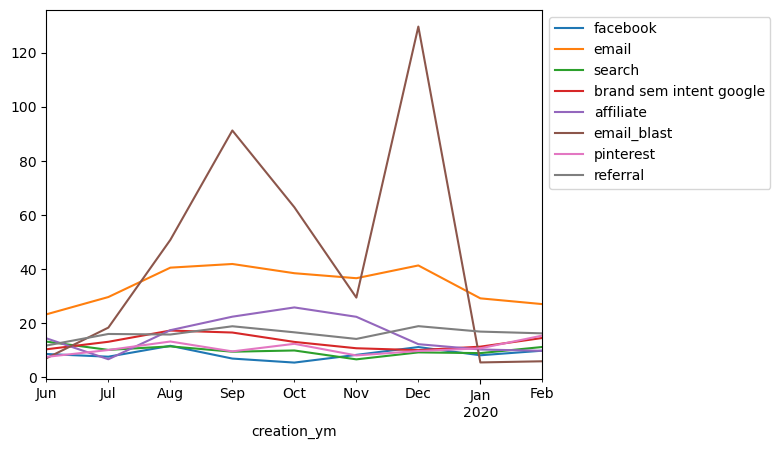

In [282]:
df_cac.plot().legend(bbox_to_anchor=(1, 1))

In [243]:
df_cac.mean().to_frame('avg_CAC')

,avg_CAC
facebook,8.591628
email,34.194115
search,9.975264
brand sem intent google,12.964632
affiliate,15.675902
email_blast,44.505211
pinterest,10.712860
referral,16.107528


# Churn

## Functions

In [244]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [245]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [247]:
# first part from sub df, then clean nan value and add churn tf value
churn1 = df_sub.iloc[:,[0,8,5,7,9,20]].reset_index(drop=True)

# subid -> for merge data  
# age -> continious variable; NO CHANGE
# retarget_TF -> 1 if this person was a previous subscriber who had churned; CHANGE TO 1/0
# male_TF -> 1 male, 0 female; CHANGE TO 1/0
# cancel_before_trial_end -> 1 if cancelled; CHANGE TO 1/0

churn1['male_TF'] = churn1['male_TF'].astype(int)
churn1['retarget_TF'] = churn1['retarget_TF'].astype(int)
churn1['cancel_before_trial_end'] = churn1['cancel_before_trial_end'].astype(int)

churn1.dropna(inplace=True)
churn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188704 entries, 0 to 191456
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subid                    188704 non-null  int64  
 1   age                      188704 non-null  float64
 2   weekly_consumption_hour  188704 non-null  float64
 3   retarget_TF              188704 non-null  int64  
 4   male_TF                  188704 non-null  int64  
 5   cancel_before_trial_end  188704 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 10.1 MB


In [248]:
# second part from engage df, take average, then clean nan value
churn2 = df_engage.iloc[:,[0,2,4,5,6,7]]
churn2 = churn2.groupby('subid').mean().reset_index()

In [249]:
churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135019 entries, 0 to 135018
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   subid                            135019 non-null  int64  
 1   app_opens                        135019 non-null  float64
 2   num_videos_completed             135019 non-null  float64
 3   num_videos_more_than_30_seconds  135019 non-null  float64
 4   num_videos_rated                 135019 non-null  float64
 5   num_series_started               135019 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 6.2 MB


In [250]:
# check each subid only has either churn/no churn so i can extract id and current_sub_tf
assert len(df_rep[['subid','current_sub_TF']].value_counts().reset_index()['subid'].unique()) == df_rep[['subid','current_sub_TF']].value_counts().reset_index().shape[0]

In [251]:
churn3 = df_rep[['subid','current_sub_TF']].value_counts().reset_index()
churn3 = churn3[['subid','current_sub_TF']]

#b/c y is churntf so switch false and true
churn3['current_sub_TF'] = churn3['current_sub_TF'].apply(lambda x: -999 if x == False else 111)
# -999 means unsubscribed (true for churn_tf now); 111 means subscriber (so no churn false)
churn3['current_sub_TF'] = churn3['current_sub_TF'].apply(lambda x: True if x == -999 else False)
churn3 = churn3.rename(columns = {'current_sub_TF':'churn_TF'})

In [252]:
churn12 = churn1.merge(churn2,on="subid",how="left").dropna()
churn = churn12.merge(churn3,on="subid",how="left").dropna()

In [254]:
churn.shape

(110443, 12)

In [549]:
churn.columns

Index(['subid', 'age', 'weekly_consumption_hour', 'retarget_TF', 'male_TF',
       'cancel_before_trial_end', 'app_opens', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started', 'churn_TF'],
      dtype='object')

,age,weekly_consumption_hour,retarget_TF,male_TF,cancel_before_trial_end,app_opens,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF
age,1.000000,-0.031305,0.007570,0.031536,0.066595,0.001271,-0.103940,0.001769,0.078785,0.010944,-0.097562
weekly_consumption_hour,-0.031305,1.000000,-0.022363,0.560573,0.075948,0.006655,-0.029154,-0.025855,-0.000243,0.010226,-0.090913
retarget_TF,0.007570,-0.022363,1.000000,-0.035977,0.015191,0.004551,0.004315,-0.010293,0.014417,0.018819,-0.010606
male_TF,0.031536,0.560573,-0.035977,1.000000,0.110944,-0.006590,-0.076205,-0.037614,-0.001399,-0.002423,-0.141985
cancel_before_trial_end,0.066595,0.075948,0.015191,0.110944,1.000000,0.052852,-0.065245,-0.252200,0.315578,0.238819,-0.584130
app_opens,0.001271,0.006655,0.004551,-0.006590,0.052852,1.000000,0.310786,0.143108,0.062896,0.350558,-0.087898
num_videos_completed,-0.103940,-0.029154,0.004315,-0.076205,-0.065245,0.310786,1.000000,0.439797,0.168188,0.557377,0.011516
num_videos_more_than_30_seconds,0.001769,-0.025855,-0.010293,-0.037614,-0.252200,0.143108,0.439797,1.000000,-0.058146,0.058834,0.155299
num_videos_rated,0.078785,-0.000243,0.014417,-0.001399,0.315578,0.062896,0.168188,-0.058146,1.000000,0.273355,-0.253766
num_series_started,0.010944,0.010226,0.018819,-0.002423,0.238819,0.350558,0.557377,0.058834,0.273355,1.000000,-0.209967


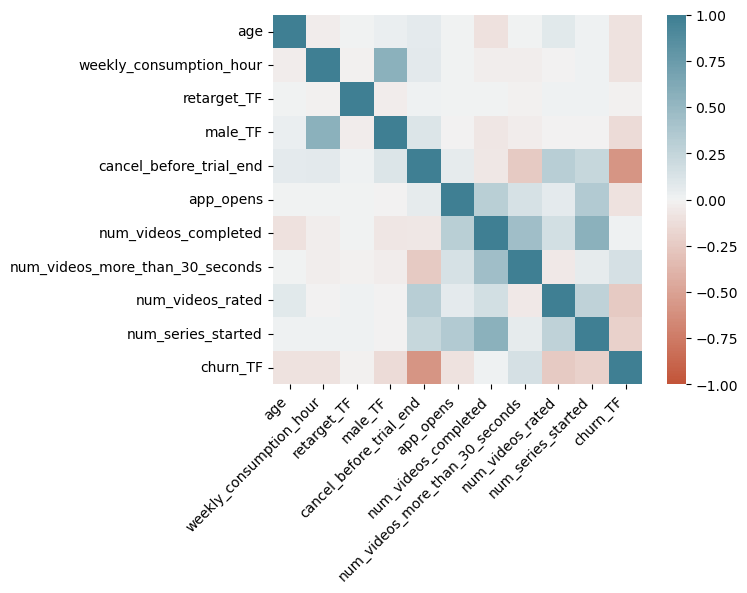

In [256]:
# check correlation
# churn.iloc[:,1:].corr()

corr = churn.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]].corr()
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

corr

## Data Preprocessing

In [257]:
# first part from sub df, then clean nan value and add churn tf value
churn_sub = df_sub.iloc[:,[0,2,5,8,16,24,1,3,4,7,9,13,20,27]].reset_index(drop=True)

# remove null rows
churn_sub['num_weekly_services_utilized'] = churn_sub['num_weekly_services_utilized'].fillna(0.0)
churn_sub['weekly_consumption_hour'] = churn_sub['weekly_consumption_hour'].fillna(0.0)
churn_sub['preferred_genre'] = churn_sub['preferred_genre'].fillna('unknown')
churn_sub['intended_use'] = churn_sub['intended_use'].fillna('unknown')

churn_sub.dropna(inplace=True)
churn_sub.reset_index(drop=True,inplace=True)

# change 1/0
churn_sub['retarget_TF'] = churn_sub['retarget_TF'].astype(int)
churn_sub['male_TF'] = churn_sub['male_TF'].astype(int)

churn_sub['op_sys'] = churn_sub['op_sys'].apply(lambda x: 1 if x == 'Android' else 0)
churn_sub['cancel_before_trial_end'] = churn_sub['cancel_before_trial_end'].astype(int)
churn_sub['refund_after_trial_TF'] = churn_sub['refund_after_trial_TF'].astype(int)

# add range to age so can to_dummy
col = 'age'
conditions = [(churn_sub[col] > 13) & (churn_sub[col] <= 20),
              (churn_sub[col] > 20) & (churn_sub[col] <= 40),
              (churn_sub[col] > 40) & (churn_sub[col] <= 60),
              (churn_sub[col] > 60)]
choices = ["teenagers", 'adults', 'middle_aged_adults', 'retired']
churn_sub['age'] = np.select(conditions, choices)

# to_dummy
churn_dummy = pd.get_dummies(churn_sub,
               columns=['preferred_genre','intended_use','package_type','age'],
               prefix=['genre:','use:','package:','age_range:'])

In [259]:
# rep
churn_TF = df_rep[['subid','current_sub_TF','payment_period']]\
    .groupby('subid').max('payment_period').reset_index()


churn_TF['current_sub_TF'] = churn_TF['current_sub_TF'].apply(lambda x: -999 if x == False else 111)
churn_TF['current_sub_TF'] = churn_TF['current_sub_TF'].apply(lambda x: True if x == -999 else False)
churn_TF = churn_TF.rename(columns = {'current_sub_TF':'churn_TF'})

# engagement
churn_eng = df_engage.iloc[:,[0,2,4,5,6,7]]
churn_eng = churn_eng.groupby('subid').mean().reset_index()

# merge
churn_sub_merge_half = churn_TF.merge(churn_dummy, on='subid', how='left').dropna().reset_index(drop=True)
churn_sub_merge = churn_sub_merge_half.merge(churn_eng, on='subid', how='left').dropna().reset_index(drop=True)

churn_sub_merge['payment_period'] = churn_sub_merge['payment_period'].astype(float)

In [260]:
churn_sub_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86273 entries, 0 to 86272
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   subid                             86273 non-null  int64  
 1   churn_TF                          86273 non-null  bool   
 2   payment_period                    86273 non-null  float64
 3   num_weekly_services_utilized      86273 non-null  float64
 4   weekly_consumption_hour           86273 non-null  float64
 5   monthly_price                     86273 non-null  float64
 6   join_fee                          86273 non-null  float64
 7   retarget_TF                       86273 non-null  float64
 8   male_TF                           86273 non-null  float64
 9   op_sys                            86273 non-null  float64
 10  cancel_before_trial_end           86273 non-null  float64
 11  refund_after_trial_TF             86273 non-null  float64
 12  genr

,payment_period,num_weekly_services_utilized,weekly_consumption_hour,monthly_price,join_fee,app_opens,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
payment_period,1.000000,0.202320,0.088529,0.016651,0.020490,0.061847,-0.056974,-0.235643,0.343546,0.239731
num_weekly_services_utilized,0.202320,1.000000,0.148694,-0.002238,0.012590,0.187113,0.294937,-0.046699,0.125308,0.669150
weekly_consumption_hour,0.088529,0.148694,1.000000,-0.004785,0.039944,-0.001229,-0.032399,-0.029044,0.004698,0.012089
monthly_price,0.016651,-0.002238,-0.004785,1.000000,-0.025381,-0.008020,-0.009422,-0.013321,0.002262,0.001100
join_fee,0.020490,0.012590,0.039944,-0.025381,1.000000,-0.012644,-0.050971,-0.009314,0.013896,-0.000701
app_opens,0.061847,0.187113,-0.001229,-0.008020,-0.012644,1.000000,0.323799,0.140953,0.059624,0.364884
num_videos_completed,-0.056974,0.294937,-0.032399,-0.009422,-0.050971,0.323799,1.000000,0.429062,0.154346,0.546454
num_videos_more_than_30_seconds,-0.235643,-0.046699,-0.029044,-0.013321,-0.009314,0.140953,0.429062,1.000000,-0.062347,0.037205
num_videos_rated,0.343546,0.125308,0.004698,0.002262,0.013896,0.059624,0.154346,-0.062347,1.000000,0.260348
num_series_started,0.239731,0.669150,0.012089,0.001100,-0.000701,0.364884,0.546454,0.037205,0.260348,1.000000


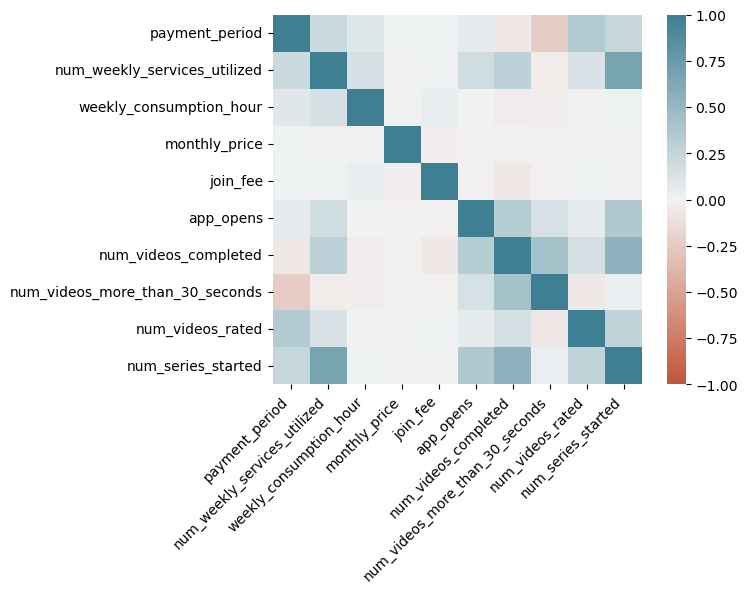

In [261]:
# check correlation
corr = churn_sub_merge.iloc[:,[2,3,4,5,6,33,34,35,36,37]].corr()
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

corr

In [262]:
df_engage['num_videos_rated'].value_counts()

0.0     2424308
1.0      107745
2.0       15728
3.0        2553
4.0         590
5.0         135
6.0          33
7.0          12
8.0           4
9.0           3
11.0          1
12.0          1
Name: num_videos_rated, dtype: int64

In [263]:
churn_sub_merge.describe()

,subid,payment_period,num_weekly_services_utilized,weekly_consumption_hour,monthly_price,join_fee,retarget_TF,male_TF,op_sys,cancel_before_trial_end,refund_after_trial_TF,genre:_comedy,genre:_drama,genre:_international,genre:_other,genre:_regional,genre:_unknown,use:_access to exclusive content,use:_education,use:_expand international access,use:_expand regional access,use:_other,use:_replace OTT,use:_supplement OTT,use:_unknown,package:_base,package:_economy,package:_enhanced,age_range:_adults,age_range:_middle_aged_adults,age_range:_retired,age_range:_teenagers,app_opens,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
count,8.627300e+04,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000,86273.000000
mean,2.500014e+07,0.327971,2.131020,27.981819,4.735271,0.137269,0.032432,0.129554,0.341347,0.317805,0.032316,0.627404,0.249035,0.036640,0.025640,0.057573,0.003709,0.449480,0.000464,0.000962,0.001043,0.032328,0.363068,0.147659,0.004996,0.557301,0.096299,0.346400,0.368910,0.455913,0.158265,0.016911,1.814770,2.533814,4.828881,0.013708,0.432653
std,2.886058e+06,0.576805,1.498912,5.045052,0.020001,0.189916,0.177145,0.335814,0.474164,0.465626,0.176839,0.483499,0.432457,0.187876,0.158058,0.232936,0.060790,0.497444,0.021528,0.031002,0.032282,0.176870,0.480887,0.354764,0.070504,0.496709,0.295003,0.475825,0.482512,0.498055,0.364991,0.128940,1.548133,1.639941,1.230223,0.063427,0.361937
min,2.000040e+07,0.000000,0.000000,0.000000,4.000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.249468e+07,0.000000,0.000000,24.401536,4.734300,0.036700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.142857,4.333333,0.000000,0.000000
50%,2.499692e+07,0.000000,2.546947,27.301448,4.734300,0.036700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,2.400000,4.823529,0.000000,0.416667
75%,2.751351e+07,1.000000,2.994681,30.201361,4.734300,0.330300,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.189189,3.767442,5.500000,0.000000,0.777778
max,2.999982e+07,3.000000,9.858013,75.150006,5.101300,0.734000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.250000,13.000000,15.000000,2.782609,2.000000


## Churn Model

In [264]:
random.seed(666)
df_train, df_test = model_selection.train_test_split(churn_sub_merge, test_size=0.4)

In [265]:
churn_sub_merge.columns

Index(['subid', 'churn_TF', 'payment_period', 'num_weekly_services_utilized',
       'weekly_consumption_hour', 'monthly_price', 'join_fee', 'retarget_TF',
       'male_TF', 'op_sys', 'cancel_before_trial_end', 'refund_after_trial_TF',
       'genre:_comedy', 'genre:_drama', 'genre:_international', 'genre:_other',
       'genre:_regional', 'genre:_unknown', 'use:_access to exclusive content',
       'use:_education', 'use:_expand international access',
       'use:_expand regional access', 'use:_other', 'use:_replace OTT',
       'use:_supplement OTT', 'use:_unknown', 'package:_base',
       'package:_economy', 'package:_enhanced', 'age_range:_adults',
       'age_range:_middle_aged_adults', 'age_range:_retired',
       'age_range:_teenagers', 'app_opens', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started'],
      dtype='object')

In [266]:
# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF'  # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = [
       'num_weekly_services_utilized','payment_period', 
       'weekly_consumption_hour', 'join_fee', 'retarget_TF','monthly_price', 
       'male_TF', 'op_sys', #'cancel_before_trial_end', 'refund_after_trial_TF',
       'genre:_comedy', 'genre:_drama', 'genre:_international', 'genre:_other',
       'genre:_regional','use:_access to exclusive content', 'genre:_unknown', 
       'use:_education', 'use:_expand international access',
       'use:_expand regional access', 'use:_other', 'use:_replace OTT',
       'use:_supplement OTT', 'package:_base','use:_unknown', 
       'package:_economy', 'package:_enhanced', 'age_range:_adults',
       'age_range:_middle_aged_adults', 'age_range:_retired',
       'age_range:_teenagers', 'app_opens', 'num_videos_completed',
       'num_videos_rated',#'num_videos_more_than_30_seconds', 
       'num_series_started'
]  #'cancel_before_trial_end','refund_after_trial_TF', 'monthly_price', 

add_constant_TF = True

# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [267]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     2745.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:21:10   Log-Likelihood:                 859.67
No. Observations:               51763   AIC:                            -1659.
Df Residuals:                   51733   BIC:                            -1394.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [268]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

         Current function value: 0.162110
         Iterations: 35

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                51763
Model:                          Logit   Df Residuals:                    51733
Method:                           MLE   Df Model:                           29
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.6494
Time:                        17:21:21   Log-Likelihood:                -8391.3
converged:                      False   LL-Null:                       -23932.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
num_weekly_services_utilized        -0.0417      0.019     -2.248  

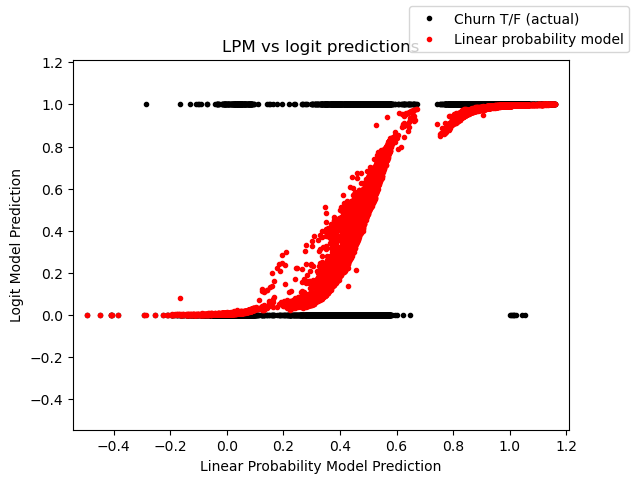

In [269]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

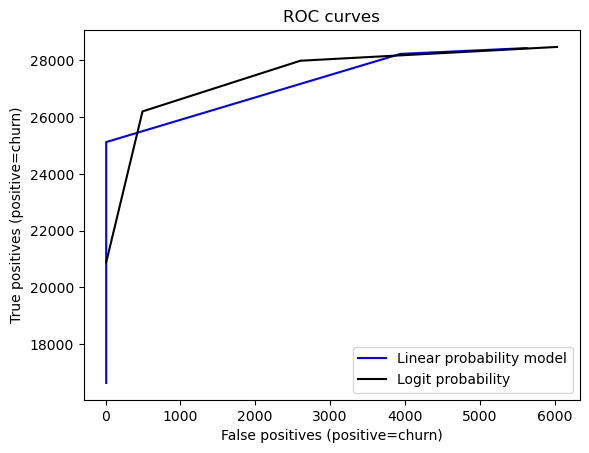

In [270]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'k-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

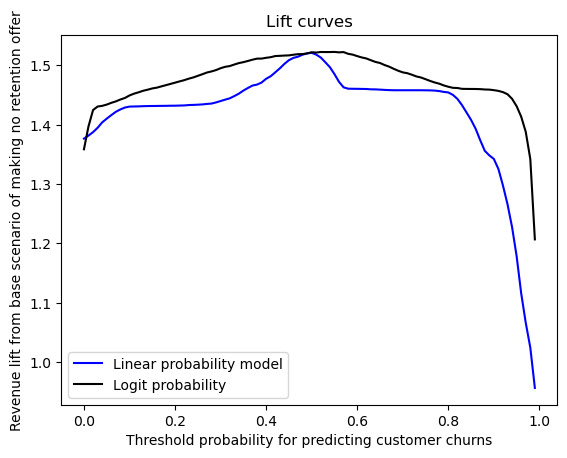

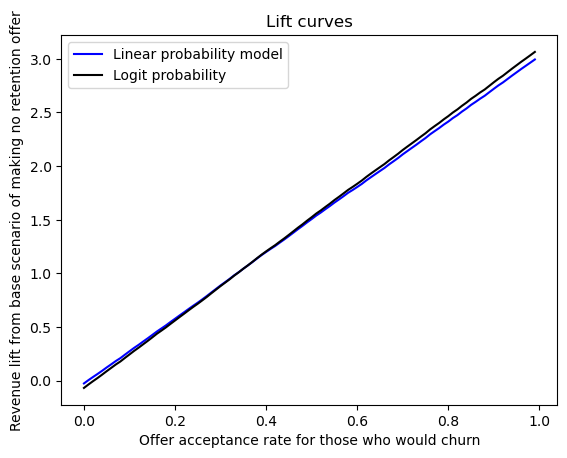

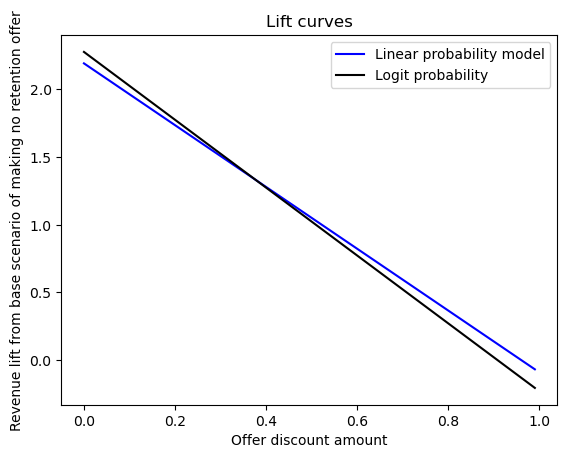

In [271]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.5
threshold = 0.53
base_price = 4.73
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    t_acceptance_rate_churn = t_discount_amount ** 2
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'k-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'k-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'k-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

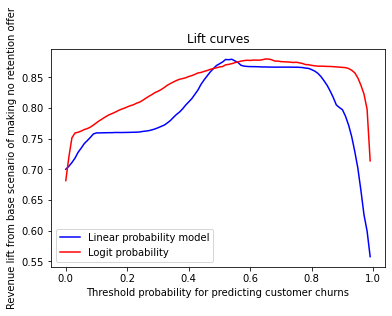

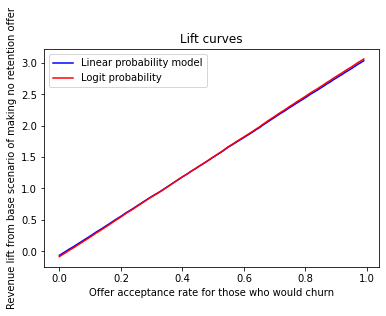

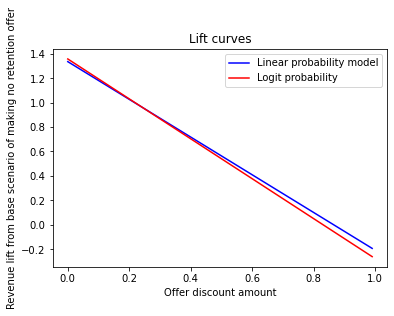

In [837]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.9
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])


In [835]:
attr1_pro = attr.copy()

# create 3 individual columns: month&year, mo, year
attr1_pro['creation_ym'] = pd.to_datetime(attr['account_creation_date']).dt.to_period('M')
attr1_pro['creation_year'] = pd.to_datetime(attr['account_creation_date']).dt.to_period('Y')
attr1_pro['creation_month'] = attr['account_creation_date'].dt.month

# remove unneeded columns
attr1_pro = attr1_pro.iloc[:,1:]

# pivoting 
attr1_pivot = attr1_pro[[
    'creation_ym', 'attribution_technical'
]].value_counts().reset_index().rename(columns={0: 'count'})

attr1_pivot = attr1_pivot.pivot(index='creation_ym', columns='attribution_technical', values='count').reset_index()
attr1_pivot.columns

Index(['creation_ym', 'affiliate', 'appstore', 'bing', 'bing_organic',
       'brand sem intent bing', 'brand sem intent google', 'content_greatist',
       'criteo', 'direct_mail', 'discovery', 'display', 'email', 'email_blast',
       'facebook', 'facebook_organic', 'google_organic', 'influencer',
       'internal', 'organic', 'other', 'ott', 'pinterest', 'pinterest_organic',
       'playstore', 'podcast', 'quora', 'referral', 'samsung', 'search', 'tv',
       'twitter', 'vod', 'youtube'],
      dtype='object', name='attribution_technical')

In [860]:
print(sub['creation_until_cancel_days'].mean())
print(sub['revenue_net'].mean())

14.159372571475316
1.5559843860501132
